<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2

### <center> Автор материала: Константин Измайлов

Данный проект будет посвящен анализу текучки ценных сотрудников компании, данные взяты из датасета от компании. IBM
Сам датасет можно найти на [kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).

# Анализ оттока сотрудников компании

## 1. Описание набора данных и признаков

<B> Ценность исследования. </B>На сегодняшний день персонал представляет собой один из основных ресурсов фирмы, управление и развитие которого во многом определяет состояние организации в целом. Работа с ним требует эффективной политики руководства, по сути, уникальной для каждого предприятия.

Одной из проблем работы с персоналом является текучесть кадров. Она может привести к упущению прибыли, потере квалифицированных рабочих, снижению качества продукции, росту изделий с браком и увеличению числа прогулов. Чтобы контролировать увольнения и понять, как удержать лучших сотрудников, необходимо определить причины, по которым люди покидают компанию.

В случае, если уход сотрудников из компании неизбежен, то необходимо взять данный процесс под контроль и суметь вовремя среагировать, чтобы минимизировать потери компании.

<B>Процесс сбора данных.</B> Датасет был сгенерирован искусственно сотрудниками компании IBM.

<B>Целевая переменная.</B> Целевая переменная представляет собой флаг ухода сотрудника из компании.

<B>Описание признаков.</B> Датасет состоит из целевой переменной (Attrition), 34 признаков, включащих как числовые, так и категориальные признаки, всего в датасете - 1470 объектов.

<I>Age</I> -  Возраст(Numeric)
<I>Attrition</I> -  Флаг ухода из компании(String)
<I>BusinessTravel</I> -  Частота командировок(String)
<I>DailyRate</I> - Ставка в день в долларах(Numeric)
<I>Department</I> - Департамент(String)
<I>DistanceFromHome</I> -  Расстояние от дома до работы(Numeric)
<I>Education</I> -  Образование(Numeric)
<I>EducationField</I> -  Специальность(String)
<I>EmployeeCount</I> - Число подчиненных(Numeric)
<I>EmployeeNumber</I> - (Numeric)
<I>EnvironmentSatisfaction</I> -  Удовлетворенность обстановкой в компании(Numeric)
<I>Gender</I> -  Пол(String)
<I>HourlyRate</I> - Время работы(Numeric)
<I>JobInvolvement</I> -  Вовлеченность в работу(Numeric)
<I>JobRole</I> -  Должность(String)
<I>JobSatisfaction</I> - Удовлетворенность работй(Numeric)
<I>MaritalStatus</I> - Семейное положение(String)
<I>MonthlyIncome</I> - Доход в месяц(Numeric)
<I>MonthlyRate</I> - Ставка в месяц(Numeric)
<I>NumCompaniesWorked</I> - Число компаний, где работал сотрудник до текущей компании(Numeric)
<I>Over18</I> - Больше 18 лет(String)
<I>OverTime</I> - Сверхурочное время(String)
<I>PercentSalaryHike</I> - Надбавка к заработной плате(Numeric)
<I>PerformanceRating</I> - Рейтинг производительности(Numeric)
<I>RelationshipSatisfaction</I> - Удовлетворение отношением внутри коллектива(Numeric)
<I>StandardHours</I> - Стандартный график работы(Numeric)
<I>StockOptionLevel</I> - Сколько акций комании есть у сотрудника(Numeric)
<I>TotalWorkingYears</I> - Продолжительность трудового стажа(Numeric)
<I>TrainingTimesLastYear</I> - Общее время посещения тренировочных семинаров на работе(Numeric)
<I>WorkLifeBalance</I> - Соотношение свободного времени и работы(Numeric)
<I>YearsAtCompany</I> - Продолжительность работы в компании(Numeric)
<I>YearsInCurrentRole</I> - Продолжительность работы на текущей позиции(Numeric)
<I>YearsSinceLastPromotion</I> - Сколько прошло с последнего повышения(Numeric)
<I>YearsWithCurrManager</I> - Продолжительность работы с текущим менеджмером(Numeric)


## 2. Первичный анализ данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import seaborn
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Посмотрим на данные.

In [3]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


Уже сейчас, исходя только из названия признаков, можно предположить, что в датасете имеются признаки с сильной линейной взаимосвязью.

Проверим на пропуски в данных.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

В данных нет пропусков.

Посмотрим на данные более подробно, предварительно задав максимальное число столбцов для отображения в pandas.

In [5]:
pd.options.display.max_columns = 100
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Можно заметить, что некоторые признаки являются константами, их можно удалить из исследуемого датасета.

In [6]:
data_nc = data.drop(['EmployeeCount', 'StandardHours'],axis =1 )
data_nc.shape

(1470, 33)

Исследуем распределение целевой переменной в датасете.

In [7]:
data_nc['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Видим, что переменная целевого признака распределена неравномерно.

Изменим тип целевой переменной на бинарный, выделим числовые признаки в отдельную переменную.

In [8]:
attrition_dic = {'Yes':1, 'No':0}
data_nc["Attrition"] = data_nc["Attrition"].apply(lambda x: attrition_dic[x])

numerical = [u'Age', u'DailyRate', u'DistanceFromHome', u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager']

non_numerical = [u'BusinessTravel',u'Department',
 u'EducationField',
 u'Gender',
 u'JobRole',
 u'MaritalStatus', u'OverTime']

Сильной диспропорции между признаками нет, также можно из датасета убрать признак Over18 - константа.

In [9]:
data_nc = data_nc.drop(['Over18'],axis =1 )

## 3. Первичный визуальный анализ данных

Исследуем корреляцию Пирсона числовых признаков.

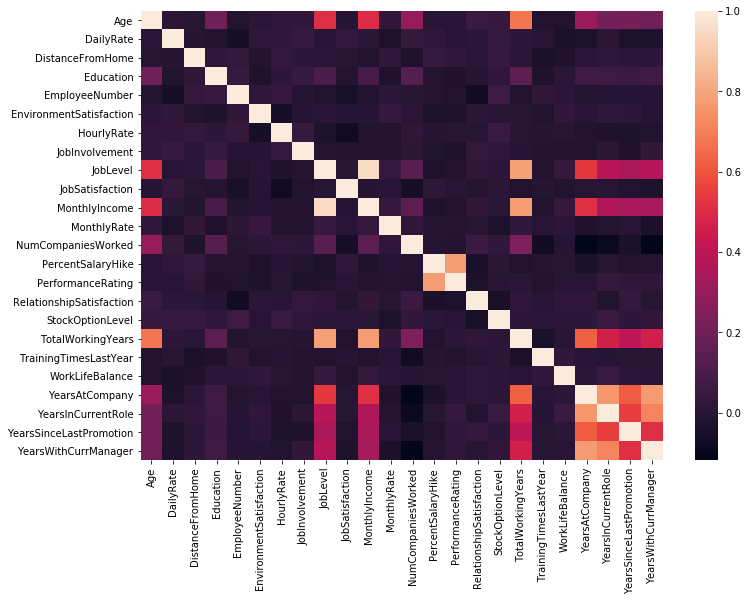

In [10]:
a4_dims = (11.7, 8.27)
df = data_nc[numerical].corr()
fig, ax = pyplot.subplots(figsize=a4_dims)
seaborn.heatmap(ax=ax, data=df)

Между признаком JobLevel и MonthlyIncome - высокая линейная взаимосвязь, что логично. Чем выше уровень работы сотрудника, тем больше месячный доход. Соответсвенно, один из признаков, возможно, является избыточным, при обучении модели попробуем в дальнейшем удалить его для повышения качества модели.

Теперь посмотрим на распределение признаков.

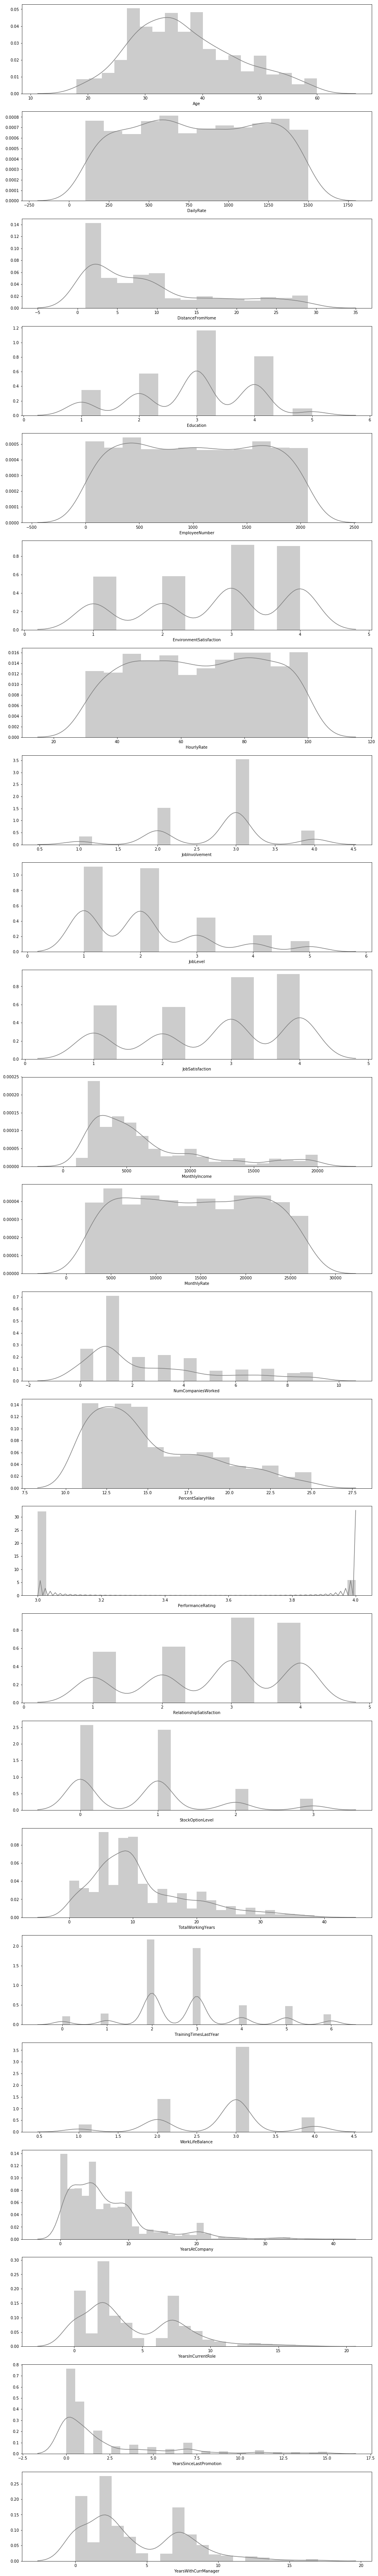

In [11]:
nc_count = len(numerical)
_, axes = pyplot.subplots(nc_count, 1, figsize=(16, nc_count * 5))

for i, col in enumerate(numerical):
    sns.distplot(data_nc[col], ax=axes[i], color = 'gray');

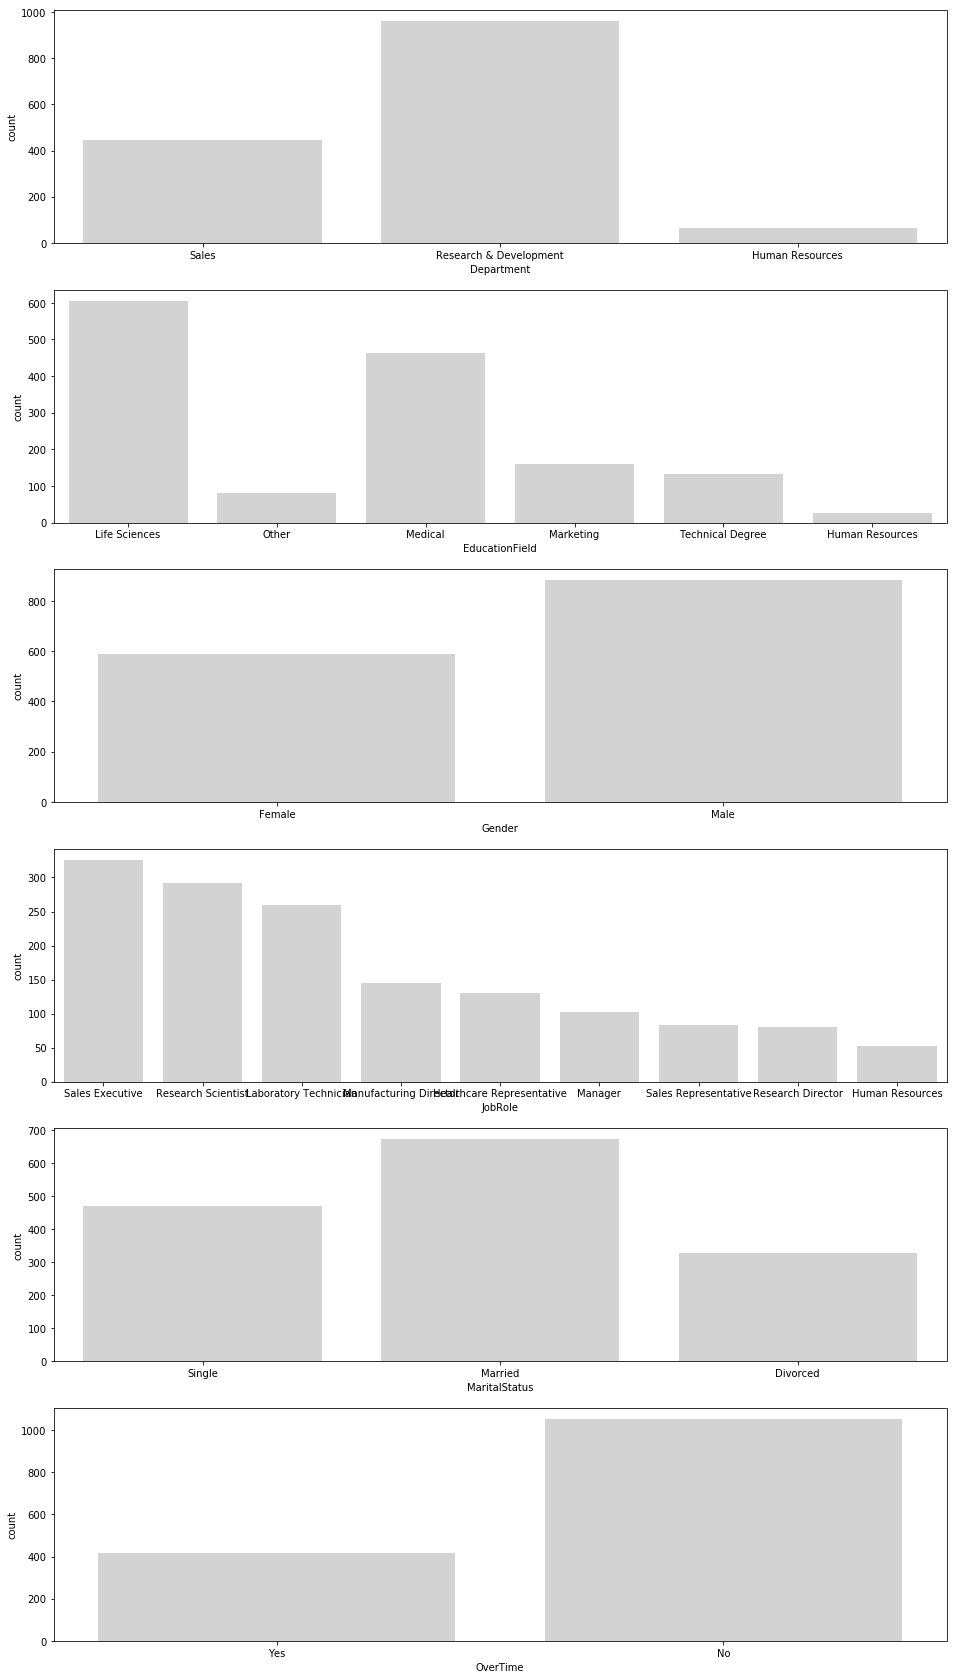

In [12]:
nc_count = len(non_numerical[1:])
_, axes = pyplot.subplots(nc_count, 1, figsize=(16, nc_count * 5))

for i, col in enumerate(non_numerical[1:]):
    sns.countplot(data_nc[col], ax=axes[i], color = 'lightgray');

Так как в качестве основной модели мы будем использовать деревья, соответсвенно, в нормализации признаков нет необходимости.

Из полученных распределений интересно обратить внимание на показатель DailyRate - распредлен равномерно, то есть работодатели анализируемой компании страются равномерно распределять дневную ставку оплаты труда среди всех сотрудников, тоже самое можно сказать и про почасовую оплату труда (HourlyRate), и про месячную оплату труду (MonthlyRate). Такое распределение можно объяснить искусственной природой данных.

Из полученных данных можно предположить, что компания работает в сфере социальных исследований. 

## 4. Инсайты, найденные зависимости

Закодируем все числовые признаки через OHE и затем попробуем найти взаимосвязь отдельных признаков с целевой переменной.

In [10]:
bt = pd.get_dummies(data_nc['BusinessTravel'])
dp = pd.get_dummies(data_nc['Department'])
ef = pd.get_dummies(data_nc['EducationField'])
g = pd.get_dummies(data_nc['Gender'])
ot = pd.get_dummies(data_nc['OverTime'])
jr = pd.get_dummies(data_nc['JobRole'])
ms = pd.get_dummies(data_nc['MaritalStatus'])

In [11]:
data_nc_feat = data_nc[numerical]
#Целевой признак
data_nc_feat['Attrition'] = data_nc['Attrition']
data_nc_feat = pd.concat([data_nc_feat, bt, dp, ef, g,ot,jr,ms], axis=1)

data_nc_feat.head(2)

C:\Users\Machine\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Female,Male,No,Yes,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [15]:
def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    pyplot.show()

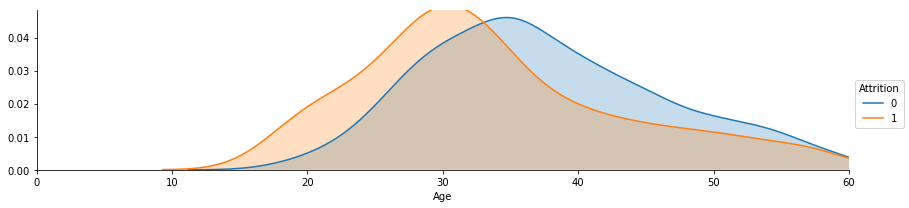

In [16]:
plot_distribution(data_nc_feat, 'Age', 'Attrition')

Видно, что большая часть людей увольняется в возрасте 30 лет.

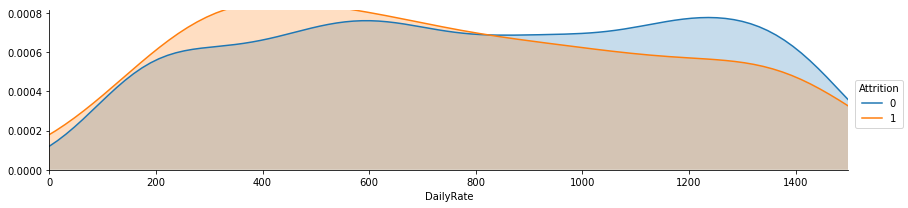

In [17]:
plot_distribution(data_nc_feat, 'DailyRate', 'Attrition')

Сотрудники со ставкой в день до 800 более склонны к увольнению.

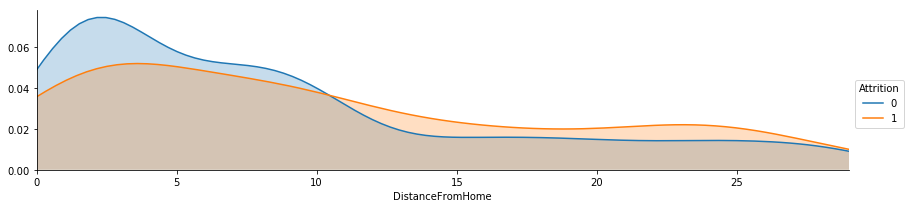

In [18]:
plot_distribution(data_nc_feat, 'DistanceFromHome', 'Attrition')

Также из распределения видно, что сотрудники более склонны к увольнению, если они живут более 10 км от работы.

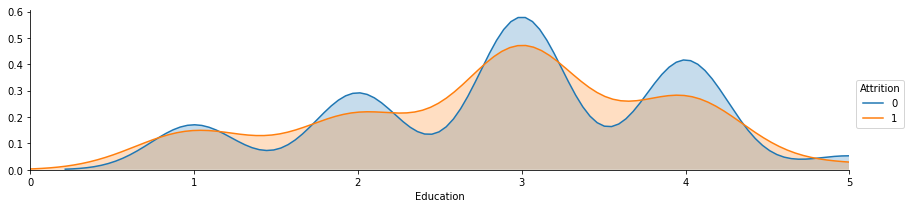

In [19]:
plot_distribution(data_nc_feat, 'Education', 'Attrition')

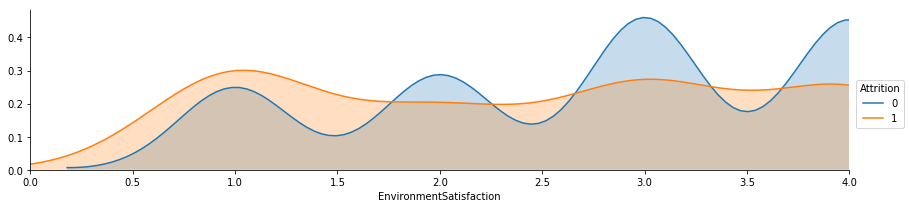

In [20]:
plot_distribution(data_nc_feat, 'EnvironmentSatisfaction', 'Attrition')

Отчетливо видно, что удовлетворенность обстановкой в коллективе сильно влияет на уход из компании.

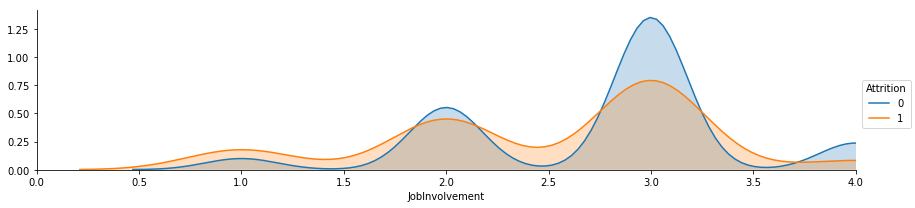

In [21]:
plot_distribution(data_nc_feat, 'JobInvolvement', 'Attrition')

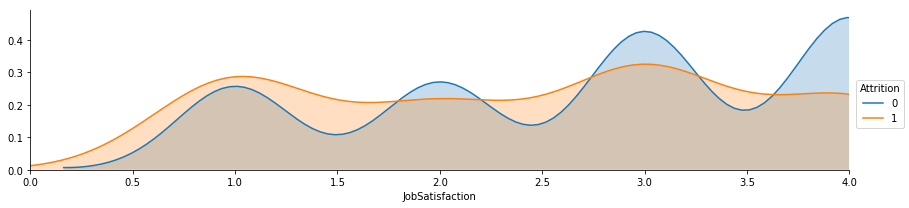

In [22]:
plot_distribution(data_nc_feat, 'JobSatisfaction', 'Attrition')

Удовлетворенность работой также влияет на отток сотрудников.

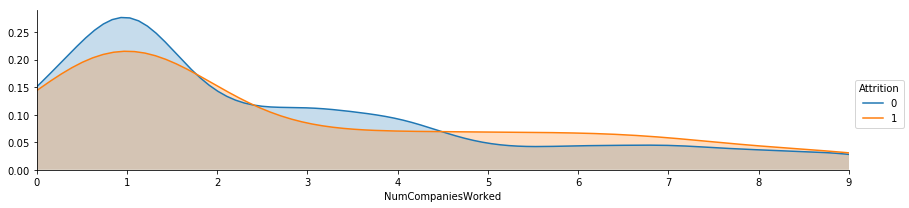

In [23]:
plot_distribution(data_nc_feat, 'NumCompaniesWorked', 'Attrition')

Сотрудники, которые много раз поменяли работу - более склонны к оттоку.

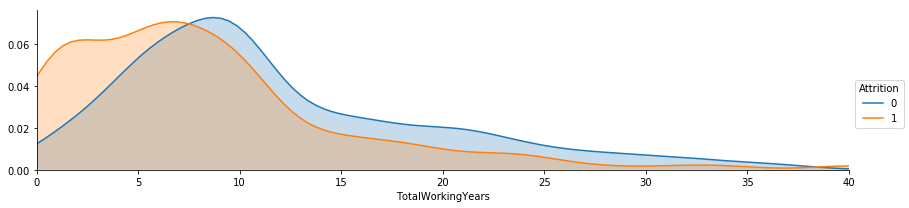

In [24]:
plot_distribution(data_nc_feat, 'TotalWorkingYears', 'Attrition')

Сотрудники, проработавшие в компании более 7 лет менее склонны к оттоку.

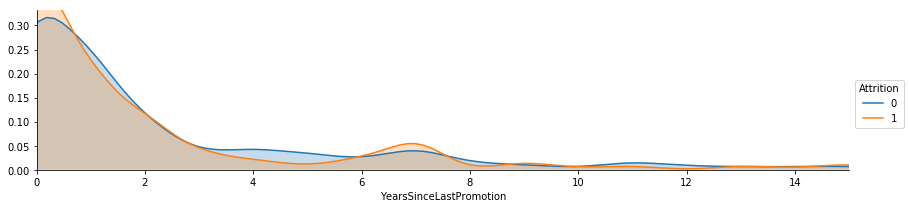

In [25]:
plot_distribution(data_nc_feat, 'YearsSinceLastPromotion', 'Attrition')

Горб на 7 годе говорит о том, что сотрудники ожидают повышение через 7 лет, в противном случае веротяность их оттока из компании возрастает.

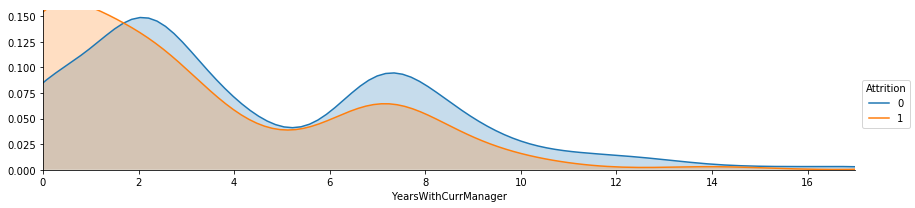

In [26]:
plot_distribution(data_nc_feat, 'YearsWithCurrManager', 'Attrition')

Сотруднику необходимо проработать с одним менеджером не менее 2 лет, чтобы вероятность его оттока из компании уменьшилась.

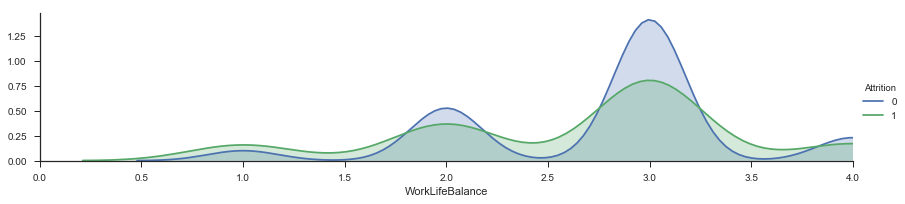

In [87]:
plot_distribution(data_nc_feat, 'WorkLifeBalance', 'Attrition')

Здесь однозначных закономерностей не видно.

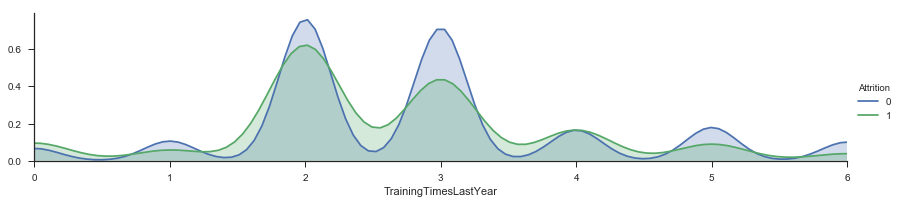

In [100]:
plot_distribution(data_nc_feat, 'TrainingTimesLastYear', 'Attrition')

Интересно, что отток больше у сотрудников, которые не посещали тренировочыне семинар за последний год, а также у сотрудников, которые посещали 4 семинара, вероятно, повысив свою квалификацию, решили найти место получше.

## 5. Выбор метрики

В качестве основной метрики для оценки качества модели будет выбран критерий ROC-AUC. Как уже было замечено, данная задача имеет высокую несбалансированность целевого класса, в свою очередь, метрика ROC AUC зависят от предсказанных вероятностей классов, а не от «жёсткой» дискретной классификации.

## 6. Выбор модели

Стоит задача бинарной классификации: определить, уволится ли сотрудник или нет.
В качестве моделей выберем:
    - RandomForestClassifier
    - XGBoostClassifier
    
Данные модели не требуют нормализацию признаков, в том числе исходный набор данных обладает небольшим количеством объектов и признаков, также видна нелинейная зависимость между целевой переменной и отдельными признаками, что было наглядно представлено в пункте 4. Это еще больше подтверждает выбор решающих деревьев в качестве основной модели. 


## 7. Предобработка данных

Необходимая предобработка данных была проведена в прочих пунктах данной работы:
    - закодированы категориальные признаки;
    - убраны признаки, ялвяющиеся константами;
    - выбраны признаки с высокой корреляцией, в дальнейшем, возможно, их стоит исключить из модели;
    - далее на этапе подбора гиперпараметров модели будет оценено качество моделей при дополнении исходной выборки синтетическими данными.

## 8. Кросс-валидация и настройка гиперпараметров модели

Для начала корректно разобьем наш исходный датасет на трейн и тест, на тесте мы оценим финальное качество алгоритма.
Разбивать будем Stratified, так как целевой класс несбалансирован. 

In [12]:
data_nc_feat.columns.values[31] = 'Human Resources 2'
data_nc_feat.columns.values[42] = 'Human Resources 3'

In [145]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_nc_feat.drop('Attrition', axis = 1), np.array(data_nc_feat['Attrition']), test_size=0.15,  random_state=42, stratify=np.array(data_nc_feat['Attrition']))

In [146]:
print('Доля положителных меток для трейна: {}'.format(sum(y_train)/X_train.shape[0]))
print('Доля положителных меток для теста: {}'.format(sum(y_test)/X_test.shape[0]))

Доля положителных меток для трейна: 0.16092874299439552
Доля положителных меток для теста: 0.16289592760180996


In [15]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [16]:
from operator import itemgetter

def report(grid_scores, n_top):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

Проведем первоначальное приближение моделей с рандомизированным побором гиперпараметров на кросс-валидации по 3 фолдам с помощью RandomizedSearchCV. 

Ограничимся основными гиперпараметрами для RandomForestClassifier:
<UL>
    <LI>n_estimators - число деревьев
    <LI>min_samples_split - минимальное число объектов, при котором выполняется расщепление
    <LI>min_samples_leaf - ограничение на число объектов в листьях
    <LI>max_depth - максимальная глубина дерева
    <LI>criterion - критерий расщипления
    
    </UL>

In [33]:
param_grid_for_forest = { "n_estimators": np.arange(10, 300, 2),
                          "max_depth": np.arange(1, 20, 1),
                          "min_samples_split": np.arange(2,150,1),
                          "min_samples_leaf": np.arange(2,60,1),
                          "max_features" : np.arange(1,X_train.shape[1],1)}

In [57]:
grid_search = RandomizedSearchCV(RandomForestClassifier(),error_score='roc-auc', param_distributions=param_grid_for_forest, cv = 3,verbose = 1,random_state = 40)
grid_search.fit(X_train, y_train)

report(grid_search.grid_scores_, 3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.8s finished


Model with rank: 1
Mean validation score: 0.8519)
Parameters: {'n_estimators': 242, 'min_samples_split': 62, 'min_samples_leaf': 30, 'max_features': 45, 'max_depth': 14}

Model with rank: 2
Mean validation score: 0.8503)
Parameters: {'n_estimators': 58, 'min_samples_split': 85, 'min_samples_leaf': 15, 'max_features': 20, 'max_depth': 9}

Model with rank: 3
Mean validation score: 0.8495)
Parameters: {'n_estimators': 74, 'min_samples_split': 99, 'min_samples_leaf': 5, 'max_features': 31, 'max_depth': 8}



C:\Users\Machine\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Аналогично и для XGBoostClassifier, для гиперпараметров: n_estimators, max_depth, subsample, colsample_bytree, reg_alpha,gamma.   

In [19]:
param_grid_for_xgb = {"n_estimators": np.arange(10, 300, 2),
                      "max_depth": np.arange(1,20,1),
                      "subsample" : [i/10.0 for i in range(1,10)],
                      'colsample_bytree':[i/10.0 for i in range(1,10)],
                      'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100]    ,
                      'gamma' : [i/10.0 for i in range(1,10)]}

In [59]:
grid_search = RandomizedSearchCV(XGBClassifier(), error_score='roc-auc',param_distributions=param_grid_for_xgb, cv = 3,verbose = 1,random_state = 40)
grid_search.fit(X_train, y_train)

report(grid_search.grid_scores_, 3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model with rank: 1
Mean validation score: 0.8655)
Parameters: {'subsample': 0.4, 'reg_alpha': 1, 'n_estimators': 52, 'max_depth': 10, 'gamma': 0.7, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: 0.8647)
Parameters: {'subsample': 0.6, 'reg_alpha': 0, 'n_estimators': 138, 'max_depth': 17, 'gamma': 0.6, 'colsample_bytree': 0.2}

Model with rank: 3
Mean validation score: 0.8623)
Parameters: {'subsample': 0.9, 'reg_alpha': 1, 'n_estimators': 80, 'max_depth': 10, 'gamma': 0.6, 'colsample_bytree': 0.5}



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.9s finished
C:\Users\Machine\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Уже можно заметить, что XGBClassifier обладает чуть лучшим качеством.

Попробуем сгенерировать дополнительные синтетические объекты для минорного класса уволившихся сотрудников и оценим качество получившихся моделей, взяв параметры моделей из RandomizedSearchCV. Стоит обратить внимание, что при оценке качества модели с учетом новых синтетических объектов данные на тесте должны остаться в прежнем виде.

In [17]:
from sklearn.model_selection import StratifiedKFold,ShuffleSplit
from imblearn.over_sampling import SMOTE,ADASYN 
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=5, random_state = 40)
scores_rf_synth = []
scores_xgb_synth = []
scores_rf = []
scores_xgb = []
for train, test in skf.split(X_train, y_train):
    smote=SMOTE(random_state=40)
    smote_train, smote_target = SMOTE().fit_sample(X_train.iloc[train],y_train[train])
    
    #RF
    model_RF = RandomForestClassifier(random_state = 40,n_estimators = 242, min_samples_split = 62, min_samples_leaf = 30, max_features = 45, max_depth = 14)
    model_RF.fit(X_train.iloc[train],y_train[train])
    predictions = model_RF.predict_proba(X_train.iloc[test])[:,1]
    scores_rf.append(roc_auc_score(y_train[test],predictions))
    
    model_RF.fit(smote_train,smote_target)
    predictions = model_RF.predict_proba(X_train.iloc[test])[:,1]
    scores_rf_synth.append(roc_auc_score(y_train[test],predictions))
    
    #XGB
    model_XGB = XGBClassifier(subsample = 0.4, reg_alpha = 1, n_estimators = 52, max_depth = 10, gamma = 0.7, colsample_bytree = 0.9)
    model_XGB.fit(X_train.iloc[train],y_train[train])
    predictions = model_XGB.predict_proba(X_train.iloc[test])[:,1]
    scores_xgb.append(roc_auc_score(y_train[test],predictions))
    
    model_XGB.fit(smote_train,smote_target)
    predictions = model_XGB.predict_proba(X_train.iloc[test].as_matrix())[:,1]
    scores_xgb_synth.append(roc_auc_score(y_train[test],predictions))

In [18]:
print('Средний ROC-AUC для RF - {}'.format(np.mean(scores_rf)))
print('Средний ROC-AUC для синтетического RF - {}'.format(np.mean(scores_rf_synth)))
print('Средний ROC-AUC для XGB - {}'.format(np.mean(scores_xgb)))
print('Средний ROC-AUC для синтетического XGB - {}'.format(np.mean(scores_xgb_synth)))

Средний ROC-AUC для RF - 0.7768163451866918
Средний ROC-AUC для синтетического RF - 0.7618642198622944
Средний ROC-AUC для XGB - 0.8105493695435928
Средний ROC-AUC для синтетического XGB - 0.7981058688850731


Добавление синтетических данных чуть ухудшило нашу модель. Для обучения модели будем использовать XGBoost на исходном датасете.

Теперь попробуем более точно подобрать гиперпараметры модели.

In [246]:
param_grid_for_xgb2 = {"n_estimators": [100,300,500],
              "max_depth": [2,5,10],
                       "subsample": [0.3,0.6,0.9],
                       "colsample_bytree":[0.3,0.6,0.9],
                       'reg_alpha':[0, 1e-2, 0.1, 1],
              "gamma": [0.3,0.6,0.9]
              }

In [247]:
grid_search = GridSearchCV(XGBClassifier(), param_grid=param_grid_for_xgb2, cv = 3,verbose = 1,error_score='roc-auc')
grid_search.fit(X_train, y_train)

report(grid_search.grid_scores_, 3)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Model with rank: 1
Mean validation score: 0.8791)
Parameters: {'colsample_bytree': 0.3, 'gamma': 0.6, 'max_depth': 2, 'n_estimators': 300, 'reg_alpha': 0, 'subsample': 0.3}

Model with rank: 2
Mean validation score: 0.8775)
Parameters: {'colsample_bytree': 0.3, 'gamma': 0.6, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 1, 'subsample': 0.3}

Model with rank: 3
Mean validation score: 0.8759)
Parameters: {'colsample_bytree': 0.3, 'gamma': 0.3, 'max_depth': 10, 'n_estimators': 300, 'reg_alpha': 1, 'subsample': 0.3}



[Parallel(n_jobs=1)]: Done 2916 out of 2916 | elapsed:  7.0min finished
C:\Users\Machine\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [248]:
model_xgb = XGBClassifier(subsample = 0.3,reg_alpha = 0, n_estimators = 300, max_depth = 2, gamma = 0.6, colsample_bytree = 0.3)

## 9. Создание новых признаков и описание этого процесса

Вместо создания новых признаков, уберем из модели незначительные признаки и оценим качество модели.

Попробуем оценить качество модели, выкинув незначимые для модели признаки.

In [249]:
feat_importance = pd.DataFrame(X_train.columns, columns = ['features'])
feat_importance['value'] = grid_search.best_estimator_.feature_importances_
feat_importance.sort_values('value')

,features,value
30,Human Resources 2,0.000000
45,Research Director,0.000000
40,Healthcare Representative,0.000000
27,Human Resources,0.001175
44,Manufacturing Director,0.001175
41,Human Resources 3,0.001175
49,Divorced,0.002350
43,Manager,0.002350
50,Married,0.003525
34,Other,0.004700


Наибольшую важность в модели имеют признаки, связанные с денежным вознаграждением сотрудников, возрастом.

In [271]:
drops_1 = feat_importance.sort_values('value')['features'][:20]
drops_2 = feat_importance.sort_values('value')['features'][:30]
drops_3 = feat_importance.sort_values('value')['features'][:10]

In [267]:
skf = StratifiedKFold(n_splits=4, random_state = 40)
scores_ = []
for train, test in skf.split(X_train, y_train):
    model_xgb.fit(X_train.iloc[train],y_train[train])
    predictions = model_xgb.predict_proba(X_train.iloc[test])[:,1]
    scores_.append(roc_auc_score(y_train[test],predictions))
print('ROC-AUC на исходном трейне - {}'.format(np.mean(scores_)))    

ROC-AUC на исходном трейне - 0.8231293967968867


In [268]:
scores_ = []
for train, test in skf.split(X_train.drop(drops_1, axis = 1), y_train):
    model_xgb.fit(X_train.drop(drops_1, axis = 1).iloc[train],y_train[train])
    predictions = model_xgb.predict_proba(X_train.drop(drops_1, axis = 1).iloc[test])[:,1]
    scores_.append(roc_auc_score(y_train[test],predictions))
print('ROC-AUC 1 - {}'.format(np.mean(scores_))) 

ROC-AUC 1 - 0.8206821583595271


In [269]:
scores_ = []
for train, test in skf.split(X_train.drop(drops_2, axis = 1), y_train):
    model_xgb.fit(X_train.drop(drops_2, axis = 1).iloc[train],y_train[train])
    predictions = model_xgb.predict_proba(X_train.drop(drops_2, axis = 1).iloc[test])[:,1]
    scores_.append(roc_auc_score(y_train[test],predictions))
print('ROC-AUC 2 - {}'.format(np.mean(scores_))) 

ROC-AUC 2 - 0.7940087561742254


In [273]:
scores_ = []
for train, test in skf.split(X_train.drop(drops_3, axis = 1), y_train):
    model_xgb.fit(X_train.drop(drops_3, axis = 1).iloc[train],y_train[train])
    predictions = model_xgb.predict_proba(X_train.drop(drops_3, axis = 1).iloc[test])[:,1]
    scores_.append(roc_auc_score(y_train[test],predictions))
print('ROC-AUC 3 - {}'.format(np.mean(scores_))) 

ROC-AUC 3 - 0.8302900014967819


После того, как убрали из модели 10 малозначительных признаков, качество модели немного улучшилось.

Уберем из модели признак JobLevel, который имел высокую корреляцию с признаком MonthlyIncome.

In [274]:
scores_ = []
for train, test in skf.split(X_train.drop(drops_3, axis = 1).drop('JobLevel', axis = 1), y_train):
    model_xgb.fit(X_train.drop(drops_3, axis = 1).drop('JobLevel', axis = 1).iloc[train],y_train[train])
    predictions = model_xgb.predict_proba(X_train.drop(drops_3, axis = 1).drop('JobLevel', axis = 1).iloc[test])[:,1]
    scores_.append(roc_auc_score(y_train[test],predictions))
print('ROC-AUC 3 - {}'.format(np.mean(scores_))) 

ROC-AUC 3 - 0.8235657087262387


Нагенерим много новых искусственных признаков из полученного датасета без малозначимых признаков.

In [281]:
X_train_generated = X_train.drop(drops_3, axis = 1).copy()
print('\nBefore transformation: ', X_train.drop(drops_3, axis = 1).shape)
columns = X_train_generated.columns

for i1, col1 in enumerate(columns):
    for i2, col2 in enumerate(columns):
        if col1 == col2:
            X_train_generated['%s_%s_0' % (col1, col2)] = np.log(X_train[col1] + 1)     
        
        X_train_generated['%s_%s_1' % (col1, col2)] = X_train[col1] / (X_train[col2] + 1)
        X_train_generated['%s_%s_2' % (col1, col2)] = X_train[col1] * X_train[col2]
print('\nAfter transformation: ', X_train_generated.shape)


Before transformation:  (1249, 42)

After transformation:  (1249, 3612)


Немного потюним признаки и еще раз оценим качество получившейся модели.

In [283]:
#Исходный датасет без малозначимых
grid_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_grid_for_xgb, cv = 3,verbose = 1, random_state = 10)
grid_search.fit(X_train_generated, y_train)

report(grid_search.grid_scores_, 3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


Model with rank: 1
Mean validation score: 0.8671)
Parameters: {'subsample': 0.7, 'reg_alpha': 1e-05, 'n_estimators': 178, 'max_depth': 5, 'gamma': 0.7, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: 0.8663)
Parameters: {'subsample': 0.4, 'reg_alpha': 0.01, 'n_estimators': 224, 'max_depth': 13, 'gamma': 0.7, 'colsample_bytree': 0.8}

Model with rank: 3
Mean validation score: 0.8655)
Parameters: {'subsample': 0.3, 'reg_alpha': 1, 'n_estimators': 28, 'max_depth': 16, 'gamma': 0.8, 'colsample_bytree': 0.7}



C:\Users\Machine\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Качество модели только ухудшилось.

Попробуем отобрать признаки с помощью алгоритма Boruta. Данный алгоритм статистически корректно выбирает фичи из деревьев по их важности.

In [284]:
from boostaroota import BoostARoota
br = BoostARoota(clf=model_xgb)
new_train = br.fit_transform(X_train_generated, y_train)

Round:  1  iteration:  1
Round:  1  iteration:  2
Round:  1  iteration:  3
Round:  1  iteration:  4
Round:  1  iteration:  5
Round:  1  iteration:  6
Round:  1  iteration:  7
Round:  1  iteration:  8
Round:  1  iteration:  9
Round:  1  iteration:  10
Round:  2  iteration:  1
Round:  2  iteration:  2
Round:  2  iteration:  3
Round:  2  iteration:  4
Round:  2  iteration:  5
Round:  2  iteration:  6
Round:  2  iteration:  7
Round:  2  iteration:  8
Round:  2  iteration:  9
Round:  2  iteration:  10
Round:  3  iteration:  1
Round:  3  iteration:  2
Round:  3  iteration:  3
Round:  3  iteration:  4
Round:  3  iteration:  5
Round:  3  iteration:  6
Round:  3  iteration:  7
Round:  3  iteration:  8
Round:  3  iteration:  9
Round:  3  iteration:  10
Round:  4  iteration:  1
Round:  4  iteration:  2
Round:  4  iteration:  3
Round:  4  iteration:  4
Round:  4  iteration:  5
Round:  4  iteration:  6
Round:  4  iteration:  7
Round:  4  iteration:  8
Round:  4  iteration:  9
Round:  4  iteration: 

In [285]:
new_train.shape

(1249, 325)

Алгоритм оставил 325 признаков. Оценим качество получившейся модели.

In [286]:
grid_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_grid_for_xgb, cv = 3,verbose = 1, random_state = 22)
grid_search.fit(new_train, y_train)

report(grid_search.grid_scores_, 3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    9.3s finished


Model with rank: 1
Mean validation score: 0.8735)
Parameters: {'subsample': 0.1, 'reg_alpha': 1e-05, 'n_estimators': 234, 'max_depth': 13, 'gamma': 0.6, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: 0.8727)
Parameters: {'subsample': 0.5, 'reg_alpha': 0.01, 'n_estimators': 30, 'max_depth': 12, 'gamma': 0.8, 'colsample_bytree': 0.1}

Model with rank: 3
Mean validation score: 0.8719)
Parameters: {'subsample': 0.6, 'reg_alpha': 1, 'n_estimators': 124, 'max_depth': 18, 'gamma': 0.2, 'colsample_bytree': 0.4}



C:\Users\Machine\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Качество модели меняется незначительно. Оставим датасет с меньшим количеством признаков.

Теперь более точно пройдемся по сетке и сравним качество модели с гиперпарамтерами, подобранными на 8 шаге. Дали ли манипуляции с добавлением признаков улучшение качества.

In [287]:
grid_search = GridSearchCV(XGBClassifier(), param_grid=param_grid_for_xgb2, cv = 3,verbose = 1,error_score='roc-auc')
grid_search.fit(new_train, y_train)

report(grid_search.grid_scores_, 3)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


[Parallel(n_jobs=1)]: Done 2916 out of 2916 | elapsed: 32.7min finished


Model with rank: 1
Mean validation score: 0.8839)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.9, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0, 'subsample': 0.6}

Model with rank: 2
Mean validation score: 0.8831)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.3, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0, 'subsample': 0.6}

Model with rank: 3
Mean validation score: 0.8831)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.6, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0, 'subsample': 0.6}



C:\Users\Machine\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Качество модели улучшилось. Добавление признаков дало значимый прирост в качестве.

## 10. Построение кривых валидации и обучения

Построим кривые.

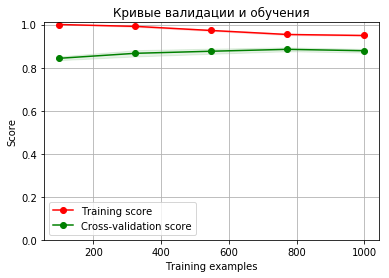

In [288]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    pyplot.figure()
    pyplot.title(title)
    if ylim is not None:
        pyplot.ylim(*ylim)
    pyplot.xlabel("Training examples")
    pyplot.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    pyplot.grid()

    pyplot.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    pyplot.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    pyplot.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    pyplot.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    pyplot.legend(loc="best")
    return pyplot


cv = StratifiedKFold(n_splits=5, random_state=5)
estimator = grid_search.best_estimator_
plot_learning_curve(estimator, 'Кривые валидации и обучения', new_train, y_train, ylim=(0.0, 1.01), cv=cv, n_jobs=8)


pyplot.show()

Модель достаточно хорошо сходится. Хотя, добавить новых признаков все же могло еще улучшить сходимость.

## 11. Прогноз для тестовой или отложенной выборки 

Приведем отложенный датасет к надлежащему виду, повторив все преобразования.

In [289]:
X_test_generated = X_test.drop(drops_3, axis = 1).copy()
print('\nBefore transformation: ', X_test.drop(drops_1, axis = 1).shape)
columns = X_test_generated.columns

for i1, col1 in enumerate(columns):
    for i2, col2 in enumerate(columns):
        if col1 == col2:
            X_test_generated['%s_%s_0' % (col1, col2)] = np.log(X_test[col1] + 1)     
        
        X_test_generated['%s_%s_1' % (col1, col2)] = X_test[col1] / (X_test[col2] + 1)
        X_test_generated['%s_%s_2' % (col1, col2)] = X_test[col1] * X_test[col2]
print('\nAfter transformation: ', X_test_generated.shape)


Before transformation:  (221, 32)

After transformation:  (221, 3612)


In [290]:
new_test = br.transform(X_test_generated)
new_test.shape

(221, 325)

In [291]:
m = grid_search.best_estimator_
m.fit(new_train,y_train)
roc_auc_score(y_test,m.predict_proba(new_test)[:, 1])

0.82807807807807809

Качество на отложенный выборке сопоставимо со средним качеством на кросс-валидации.

## 12. Выводы 

По итогу была построена модель, предсказывающая отток сотрудников из компании. При анализе было выявлено, что наибольшое влияние на отток сотрудников из компании имеют признаки, связанные с оплатой труда и возрастом.

Полученное качество модели, оцененное с поомщью метрики ROC-AUС составляет 0.83, что говорит о высокой предсказательной способности модели. 

Использовать данную модель могут спецаилисты HR-отдела, понимая, какой сотрудник с какой вероятностью может покинуть компанию, тем самым минимизируя кадровые риски компании.

Возможные улучшения:

- точнее отобрать значимые для модели признаки
- попробовать использовать дополнительные внешние данные, хоть ии на искусственном датасете это сделать нельзя (вуз, который закончил сотрудник, город)
- оценить, где алгоритм ошибается больше всего и скорректировать модель.

Спасибо за внимание!